a. Construct a time series plot. What type of pattern exists in the data? Is there an indi-
cation of a seasonal pattern?

b. Use a multiple linear regression model with dummy variables as follows to develop
an equation to account for seasonal effects in the data: Qtr1 5 1 if quarter 1, 0 other-
wise; Qtr2 5 1 if quarter 2, 0 otherwise; Qtr3 5 1 if quarter 3, 0 otherwise.

c. Compute the quarterly forecasts for the next year.

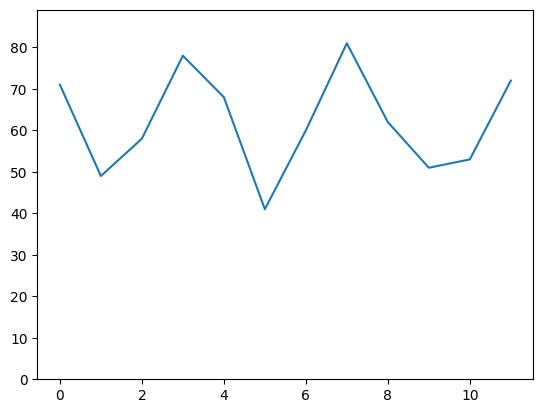

In [13]:
year = [1, 2, 3]
quarter = [1, 2, 3, 4] 
data = [[71, 68, 62],
        [49, 41, 51],
        [58, 60, 53],
        [78, 81, 72],]

flatten_data = lambda x: [data[i][idx] for idx in range(len(data[0])) for i in range(len(data))  ]

data_flat = flatten_data(data)

import matplotlib.pyplot as plt
plt.ylim(bottom = 0,top = max(data_flat)*1.1)
plt.plot(data_flat)

In [116]:
import numpy as np

def create_dummies(data, quarter):
    data = np.array(data).T.flatten()
    dummies = np.zeros((len(data), len(quarter)))

    for i in range(len(dummies)):
        dummies[i][i%(len(quarter))] = 1

    dummies = dummies[:, :-1]
        
    return dummies


data_dummied = create_dummies(data, quarter)

In [130]:
from docplex.mp.model import Model

m = Model()

b_0 = m.continuous_var(name = 'Intercept', lb = -10e6)
b_x = m.continuous_var_list(range(len(quarter) - 1), name = 'Slope', lb = -10e6)

mse = []
for i in range(len(data_dummied)):
    mse.append((b_0 + b_x @ data_dummied[i] - data_flat[i])**2)

m.minimize(sum(mse))


In [131]:
solution = m.solve(log_output = True)

Version identifier: 22.1.1.0 | 2023-02-11 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Number of nonzeros in lower triangle of Q = 3
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 4
  Integer space required    = 4
  Total non-zeros in factor = 10
  Total FP ops to factor    = 30
Tried aggregator 1 time.
QP Presolve added 0 rows and 4 columns.
Reduced QP has 4 rows, 8 columns, and 11 nonzeros.
Reduced QP objective Q matrix has 4 nonzeros.
Presolve time = 0.03 sec. (0.00 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 4
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 4
  Integer space required    = 4
  Total non-zeros in factor = 10
  Total FP o

In [132]:
print(solution)

solution for: docplex_model28
objective: 166
status: OPTIMAL_SOLUTION(2)
Intercept=77.000
Slope_0=-10.000
Slope_1=-30.000
Slope_2=-20.000

